<a href="https://colab.research.google.com/github/neeraj-pola/food-chain-market-segmentation/blob/main/food_chain_market_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/drive/MyDrive/zomato/zomato.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


#EDA

##top restaurant chains in bengaluru

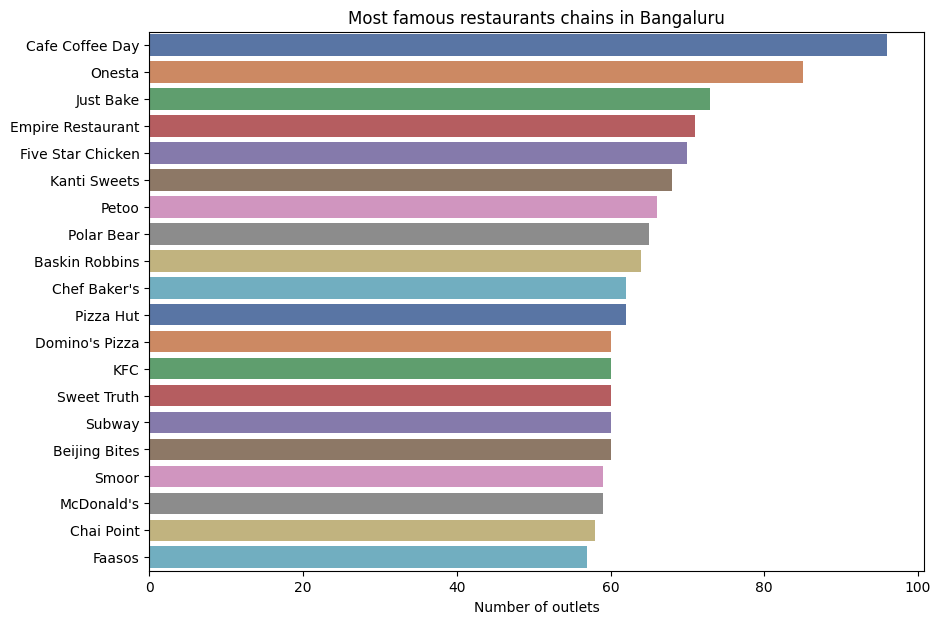

In [7]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.savefig("output-1.jpg",bbox_inches='tight')
plt.show()


###As you can see Cafe coffee day,Onesta,Just Bake has the most number of outlets in and around bangalore.

##restaurants not accepting online orders


In [8]:
import plotly.graph_objs as go
import plotly.offline as py

In [9]:
x=df['online_order'].value_counts()
colors = ['#FEBFB3', '#E1396C']

trace=go.Pie(labels=x.index,values=x,textinfo="value",
            marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
layout=go.Layout(title="Accepting vs not accepting online orders",width=500,height=500)
fig=go.Figure(data=[trace],layout=layout)
plt.savefig("output-2.jpg",bbox_inches='tight')
py.iplot(fig, filename='pie_chart_subplots')

    

<Figure size 640x480 with 0 Axes>

###mostly in India you cannot find table booking facility in any average restaurants,usually only five star restaurants provides table booking.


##Rating distribution

<Figure size 600x500 with 0 Axes>

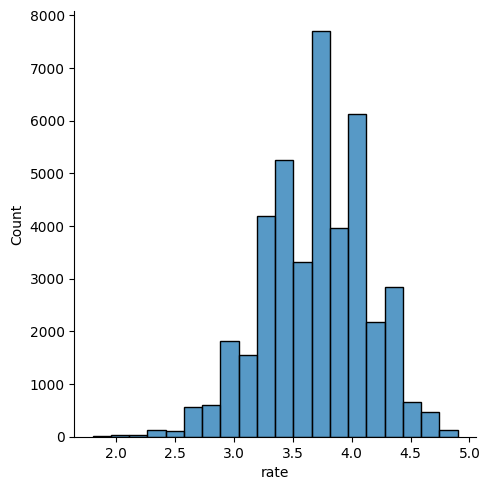

In [10]:
plt.figure(figsize=(6,5))
rating=df['rate'].dropna().apply(lambda x : float(x.split('/')[0]) if (len(x)>3)  else np.nan ).dropna()
sns.displot(rating,bins=20)
plt.savefig("output-3.jpg",bbox_inches='tight')
plt.show()

###Almost more than 50 percent of restaurants has rating between 3 and 4. Restaurants having rating more than 4.5 are very rare.

##cost vs rating

In [11]:
cost_dist=df[['rate','approx_cost(for two people)','online_order']].dropna()
cost_dist['rate']=cost_dist['rate'].apply(lambda x: float(x.split('/')[0]) if len(x)>3 else 0)
cost_dist['approx_cost(for two people)']=cost_dist['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))


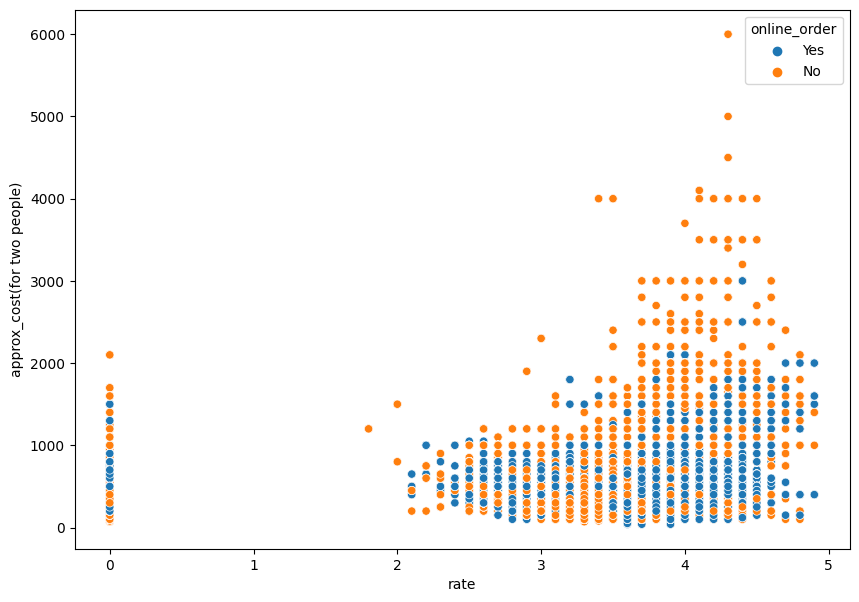

In [12]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=cost_dist)
plt.savefig("output-4.jpg",bbox_inches='tight')
plt.show()

<Figure size 600x600 with 0 Axes>

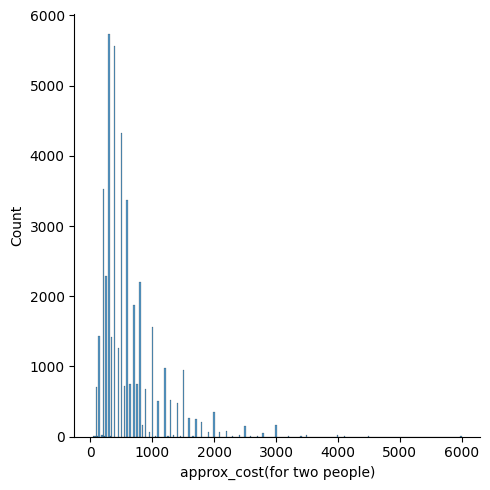

In [13]:
plt.figure(figsize=(6,6))
sns.displot(cost_dist['approx_cost(for two people)'])
plt.savefig("output-5.jpg",bbox_inches='tight')
plt.show()

###We can see that the distribution if left skewed .This means almost 90percent of restaurants serve food for budget less than 1000 INR

##difference between votes of restaurants accepting and not accepting online orders

In [14]:
votes_yes=df[df['online_order']=="Yes"]['votes']
trace0=go.Box(y=votes_yes,name="accepting online orders",
              marker = dict(
        color = 'rgb(214, 12, 140)',
    ))

votes_no=df[df['online_order']=="No"]['votes']
trace1=go.Box(y=votes_no,name="Not accepting online orders",
              marker = dict(
        color = 'rgb(0, 128, 128)',
    ))

layout = go.Layout(
    title = "Box Plots of votes",width=800,height=500
)

data=[trace0,trace1]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)
plt.savefig("output-6.jpg",bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

###Restaurants accepting online orders tend to get more votes from customers as there is a rating option poping up after each order through zomato application.

##Cost factor

In [15]:
trace0=go.Box(y=df['approx_cost(for two people)'],name="accepting online orders",
              marker = dict(
        color = 'rgb(214, 12, 140)',
    ))
data=[trace0]
layout=go.Layout(title="Box plot of approximate cost",width=800,height=500,yaxis=dict(title="Price"))
fig=go.Figure(data=data,layout=layout)
plt.savefig("output-7.jpg",bbox_inches='tight')
py.iplot(fig)

<Figure size 640x480 with 0 Axes>

###The median approximate cost for two people is 400 for a single meal.50 percent of restaurants charge between 300 and 650 for single meal for two people.

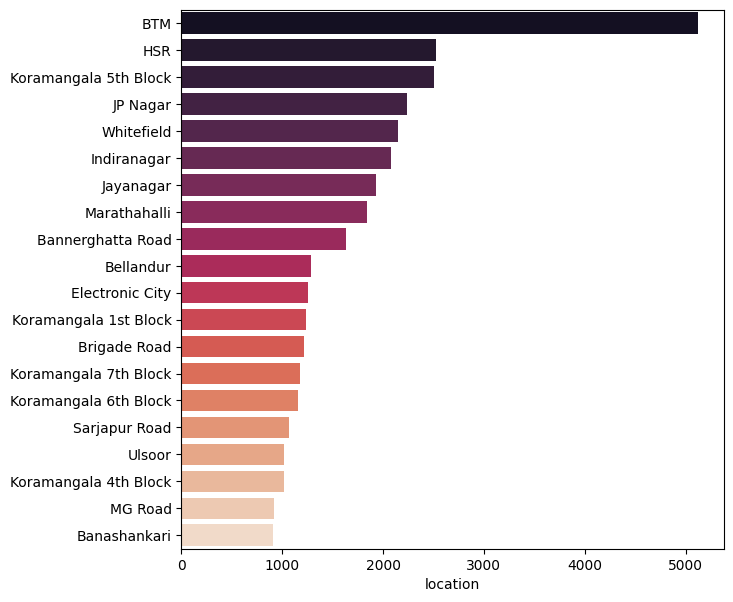

In [16]:
plt.figure(figsize=(7,7))
Rest_locations=df['location'].value_counts()[:20]
sns.barplot(x=Rest_locations,y=Rest_locations.index,palette="rocket")
plt.savefig("output-8.jpg",bbox_inches='tight')
plt.show()

#modelling

In [17]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [18]:
df = df.drop(columns=['url','address','name','phone','menu_item','listed_in(city)'],axis=1)

In [19]:
df.head(3)

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type)
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet


In [20]:
df = df.drop(columns=['reviews_list'],axis=1)

In [21]:
df = df.drop(columns=["dish_liked"],axis=1)

In [22]:
def cleane_rate(r):

    if(r=="NEW" or r=="-"):
        return np.nan

    else:
        r=str(r).split('/')
        r=r[0]
        return float(r)
    
df.rate=df["rate"].apply(cleane_rate)

In [23]:
df.head(3)

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet


In [24]:
print(df.rest_type.unique())
df.location.unique()

['Casual Dining' 'Cafe, Casual Dining' 'Quick Bites' 'Casual Dining, Cafe'
 'Cafe' 'Quick Bites, Cafe' 'Cafe, Quick Bites' 'Delivery' 'Mess'
 'Dessert Parlor' 'Bakery, Dessert Parlor' 'Pub' 'Bakery'
 'Takeaway, Delivery' 'Fine Dining' 'Beverage Shop' 'Sweet Shop' 'Bar'
 'Beverage Shop, Quick Bites' 'Confectionery' 'Quick Bites, Beverage Shop'
 'Dessert Parlor, Sweet Shop' 'Bakery, Quick Bites'
 'Sweet Shop, Quick Bites' 'Kiosk' 'Food Truck'
 'Quick Bites, Dessert Parlor' 'Beverage Shop, Dessert Parlor' 'Takeaway'
 'Pub, Casual Dining' 'Casual Dining, Bar' 'Dessert Parlor, Beverage Shop'
 'Quick Bites, Bakery' 'Dessert Parlor, Quick Bites'
 'Microbrewery, Casual Dining' 'Lounge' 'Bar, Casual Dining' 'Food Court'
 'Cafe, Bakery' nan 'Dhaba' 'Quick Bites, Sweet Shop' 'Microbrewery'
 'Food Court, Quick Bites' 'Pub, Bar' 'Casual Dining, Pub' 'Lounge, Bar'
 'Food Court, Dessert Parlor' 'Casual Dining, Sweet Shop'
 'Food Court, Casual Dining' 'Casual Dining, Microbrewery'
 'Sweet Shop, Desser

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
df.online_order = le.fit_transform(df.online_order)
df.book_table = le.fit_transform(df.book_table)
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df['listed_in(type)'] = le.fit_transform(df['listed_in(type)'])



In [27]:
df.head(3)

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,1,1,4.1,775,1,27,"North Indian, Mughlai, Chinese",800,0
1,1,0,4.1,787,1,27,"Chinese, North Indian, Thai",800,0
2,1,0,3.8,918,1,22,"Cafe, Mexican, Italian",800,0


In [28]:
df.isna().sum()

online_order                       0
book_table                         0
rate                           10052
votes                              0
location                           0
rest_type                          0
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
dtype: int64

In [29]:
df.rate.fillna(value=df.rate.mean(),inplace=True)

In [30]:
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'].str.replace(',', ''), errors='coerce')

In [31]:
df['approx_cost(for two people)'].fillna(value=df['approx_cost(for two people)'].mean(),inplace=True)

In [32]:
df = df.dropna()

In [33]:
df.isna().sum()

online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [34]:
df['cuisines']

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51672, dtype: object

In [35]:
df.head(3)

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,1,1,4.1,775,1,27,"North Indian, Mughlai, Chinese",800.0,0
1,1,0,4.1,787,1,27,"Chinese, North Indian, Thai",800.0,0
2,1,0,3.8,918,1,22,"Cafe, Mexican, Italian",800.0,0


In [36]:
df = df.drop(columns=['cuisines'])

In [37]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
0,1,1,4.1,775,1,27,800.0,0
1,1,0,4.1,787,1,27,800.0,0
2,1,0,3.8,918,1,22,800.0,0
3,0,0,3.7,88,1,78,300.0,0
4,0,0,3.8,166,4,27,600.0,0


In [38]:
df.location.unique()

array([ 1,  4, 57, 32, 49, 68, 87, 84, 29, 80, 13, 58,  3,  0, 38,  7, 10,
       19, 22, 56, 76, 90, 78, 45, 48, 71, 47, 31, 44,  6, 89, 17, 62, 27,
       41, 20, 65, 52,  8, 51, 12, 83, 70, 79, 28, 81, 15, 66, 14, 86, 21,
       16, 18, 33, 63, 55, 77, 37, 46, 54, 50, 11, 74,  9, 26, 85, 34, 42,
       43, 40, 25, 67,  2, 61, 59, 24, 36, 60, 30, 69, 82, 35, 23, 39, 75,
       72,  5, 92, 88, 53, 91, 73, 64])

In [39]:
df.rest_type.unique()

array([27, 22, 78, 29, 19, 81, 26, 39, 65, 40,  3, 73,  0, 92, 49, 14, 88,
        8, 17, 38, 80, 47,  6, 90, 59, 58, 82, 16, 91, 76, 28, 42, 79, 46,
       69, 60, 10, 53, 20, 93, 48, 87, 67, 57, 74, 33, 61, 56, 35, 55, 32,
       89,  1, 63, 24, 15, 23, 43, 41, 71,  4, 36, 83,  2,  9, 75, 30, 51,
       13,  5, 77, 70, 52, 50, 66, 45, 18, 34, 72, 21, 31,  7, 68, 25, 12,
       62, 37, 86, 85, 84, 64, 54, 44, 11])

In [40]:
x = df.drop(columns = ['rate'])
y = df.rate

In [41]:
x

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type)
0,1,1,775,1,27,800.0,0
1,1,0,787,1,27,800.0,0
2,1,0,918,1,22,800.0,0
3,0,0,88,1,78,300.0,0
4,0,0,166,4,27,600.0,0
...,...,...,...,...,...,...,...
51712,0,0,27,89,8,1500.0,6
51713,0,0,0,89,8,600.0,6
51714,0,0,0,89,8,2000.0,6
51715,0,1,236,26,8,2500.0,6


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [43]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [44]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [45]:
y_pred = model.predict(x_test)

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9013878464274375

In [47]:
x = model.predict([[1,0,400,1,27,800,1]])
print(x)

[3.83700449]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

